# RANDOM FOREST AND KNN IMPLEMENTATION

The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits from 0 to 9, with 10,000 images used for testing and 60,000 images used for training. Each image is 28x28 pixels in size, resulting in a flattened vector of 784 pixel values for each image.

In [1]:
#importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [2]:
#Measuring run time and wall clock time
start_wall_time=time.time()
start_runtime=time.process_time()

time.process_time() returns the CPU time of the current process, which is the amount of time that the process has spent executing on the CPU. This can be used to measure the run time of a program.

time.time() returns the wall clock time, which is the actual time elapsed since the start of the program. This can be used to measure the total time taken to run a program, including any time spent waiting for external resources such as disk or network I/O.

In [3]:
#Reading the input dataset file using pandas
df = pd.read_csv(r'C:\Users\nikhi\Downloads\digit-recognizer\train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


df.describe() is a method in Pandas that generates descriptive statistics for a DataFrame. It calculates various statistical measures such as count, mean, standard deviation, minimum and maximum values, and quartiles (25th, 50th, and 75th percentile) for the numerical columns in the DataFrame.

In [5]:
df.shape

(42000, 785)

df.shape is a method in Pandas that returns the dimensions of a DataFrame in the form of a tuple (rows, columns). The number of rows represents the length of the DataFrame along the vertical axis, and the number of columns represents the length of the DataFrame along the horizontal axis.

In [6]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13706,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1663,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11356,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16426,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df['label']

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

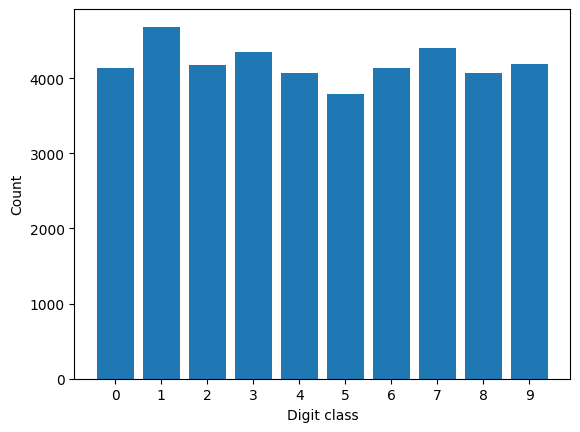

In [8]:
# Plot a histogram of the digit labels
plt.hist(df['label'], bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Digit class')
plt.ylabel('Count')
plt.show()


In [9]:
df = df.values
print(df)


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [10]:
#separating the input features X and the target variable y.
X = df[:, 1:]
y = df[:, 0]

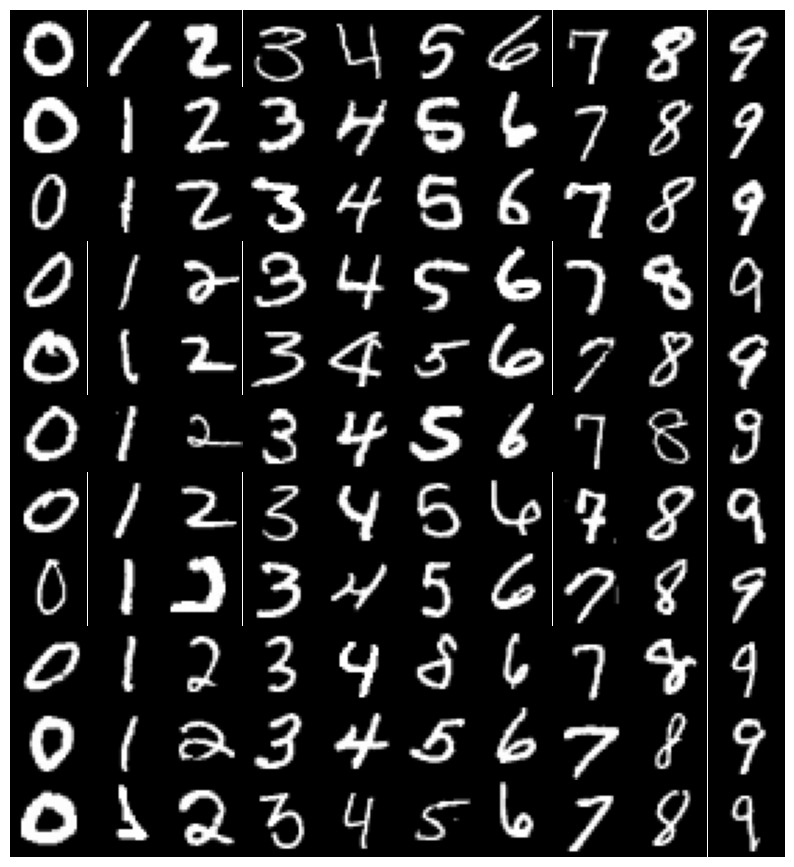

In [11]:
# To plot the first 11 images from each digit category
fig, axes = plt.subplots(nrows=11, ncols=10, figsize=(10, 11))
for i in range(10):
    images = X[y == i][:11]
    for j in range(11):
        axes[j, i].imshow(images[j].reshape(28, 28), cmap='gray')
        axes[j, i].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

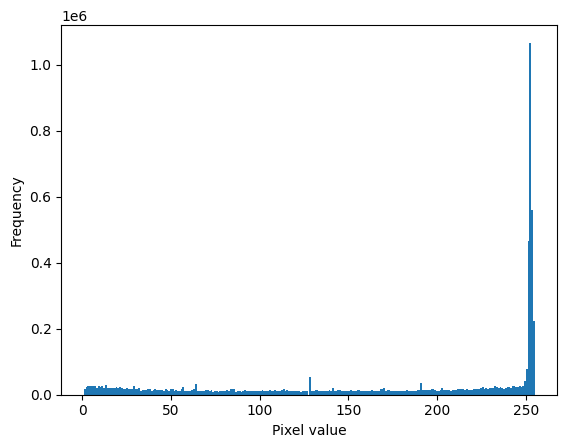

(42000, 784)
(42000,)
3


In [12]:
# Plot for the histogram of the pixel values
fig, ax = plt.subplots()
ax.hist(X.flatten(), bins=256, range=(1, 255))
ax.set_xlabel('Pixel value')
ax.set_ylabel('Frequency')
plt.show()
print(X.shape)
print(y.shape)
print(y[65])


In [13]:
#normalizing the pixel values by dividing each pixel value by 255
X=X/255
print(X.shape)
print(X[3455, 345])

(42000, 784)
0.047058823529411764


This ensures that all pixel values are between 0 and 1, which can improve the performance of machine learning algorithms.

In [14]:
n_samples = X.shape[0]

indices = np.random.permutation(n_samples)

n_train = int(0.8 * n_samples)

It randomly permutes the indices of the rows of the dataset X and stores them in indices. Then, n_samples is the number of rows in X, and n_train is calculated as 80% of n_samples using the formula int(0.8 * n_samples). n_train represents the number of rows that will be used for training the machine learning models, while the remaining 20% of the rows will be used for testing.

The purpose of shuffling the indices is to ensure that the training and test sets are representative of the whole dataset and not biased towards any specific order in which the data was collected.

In [15]:
# Split the data into training and test sets
X_train = X[indices[:n_train]]
y_train = y[indices[:n_train]]

X_test = X[indices[n_train:]]
y_test = y[indices[n_train:]]

I have done the training/test split by choosing the 80% of data for training and 20% of data for testing because it provides a good balance between having enough data to train a model effectively and having enough data to test the model's performance.

In [16]:
# Create a KNN classifier object using the Euclidean distance metric
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)


The KNN classifier fundamentally relies on a distance metric, The most common choice is the Minkowski distance
This distance definition is pretty general and contains many wellknown distances as special cases.The p value in the formula can be manipulated to give us different distances like:

p = 1, when p is set to 1 we get Manhattan distance
p = 2, when p is set to 2 we get Euclidean distance

In [17]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [18]:

# Predicting the labels of the test set using the KNN algorithm
y_pred = knn.predict(X_test)


In [19]:
# Print the accuracy of the classifier
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.964047619047619


The score() method of the KNeighborsClassifier object returns the mean accuracy on the given test data and labels. The accuracy is calculated as the number of correct predictions divided by the total number of predictions.

In [20]:
end_wall_time_KNN=time.time()
end_runtime_KNN=time.process_time()
print(f"Wall clock time of KNN algorithm is {end_wall_time_KNN-start_wall_time} seconds")
print(f"Run time of KNN algorithm is {end_runtime_KNN-start_runtime} seconds")

Wall clock time of KNN algorithm is 74.34359526634216 seconds
Run time of KNN algorithm is 113.3125 seconds


In [21]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[841   0   0   0   0   2   2   0   0   0]
 [  0 951   3   0   0   0   0   3   0   1]
 [ 12  14 819   4   0   0   2  15   2   0]
 [  1   2   3 856   0   5   0   6   4   4]
 [  0   9   0   0 724   0   1   0   0  14]
 [  3   1   0  16   2 708   8   0   4   3]
 [  5   4   1   0   1   5 826   0   2   0]
 [  0  15   4   0   2   0   0 823   0  10]
 [  4  10   4  12   4  21   4   3 776   4]
 [  2   3   1   2  14   3   0  15   1 774]]


The confusion matrix is a table that summarizes the performance of a classification algorithm by comparing the true class labels of the test data with the predicted class labels generated by the model.

The confusion_matrix function takes two arguments: y_true, which is the true class labels for the test data, and y_pred, which is the predicted class labels generated by the model.

Text(95.72222222222221, 0.5, 'Truth')

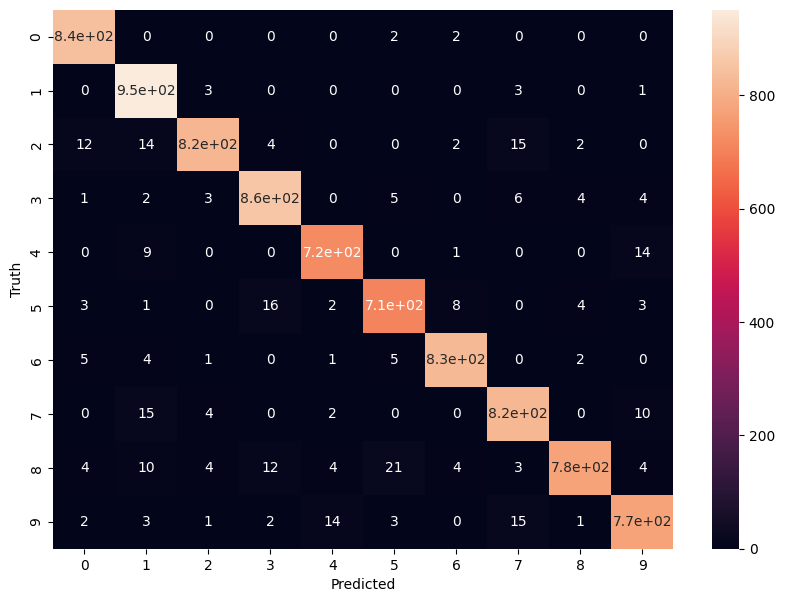

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [23]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       845
           1       0.94      0.99      0.97       958
           2       0.98      0.94      0.96       868
           3       0.96      0.97      0.97       881
           4       0.97      0.97      0.97       748
           5       0.95      0.95      0.95       745
           6       0.98      0.98      0.98       844
           7       0.95      0.96      0.96       854
           8       0.98      0.92      0.95       842
           9       0.96      0.95      0.95       815

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



The classification_report function from sklearn.metrics generates a text report of the main classification metrics. It takes as input the true labels and the predicted labels and returns a report that includes the precision, recall, F1-score, and support for each class, as well as the average metrics across all classes.

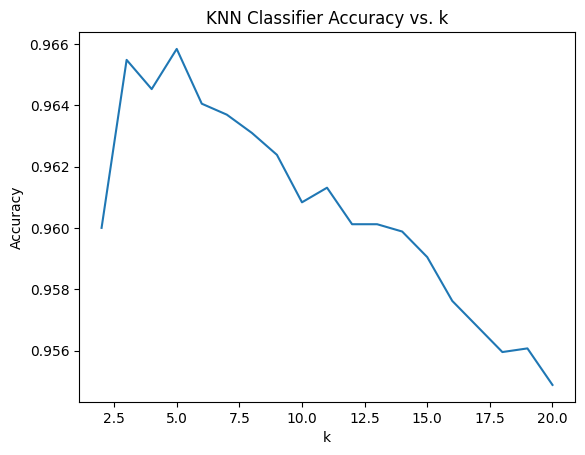

In [43]:
from sklearn.metrics import accuracy_score

# create arrays for k and accuracy values
k_values = []
accuracy_values = []

# loop over different values of k and fit the classifier
for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# plot the k vs accuracy graph
plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs. k')
plt.show()


# RANDOM FOREST IMPLEMENTATION

In [25]:
#Measuring run time and wall clock time
start_wall_time_rndfrst=time.time()
start_runtime_rndfrst=time.process_time()

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)


Random Forest classifier model is created using scikit-learn's RandomForestClassifier class, with the n_estimators parameter set to 90. The n_estimators parameter specifies the number of decision trees in the Random Forest. By default, each tree in the Random Forest uses a "bootstrap" sample of the training data, meaning that each tree is trained on a random subset of the training data with replacement. The final prediction of the Random Forest is then the majority vote of the predictions of all the individual trees.

In [34]:
# Fit the classifier to the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Print the accuracy of the model
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9646428571428571


In [36]:
end_wall_time_Rndfrst=time.time()
end_runtime_Rndfrst=time.process_time()
print(f"Wall clock time of random forest algorithm is {end_wall_time_Rndfrst-start_wall_time_rndfrst} seconds")
print(f"Run time of random forest algorithm is {end_runtime_Rndfrst-start_runtime_rndfrst} seconds")

Wall clock time of random forest algorithm is 1539.0027303695679 seconds
Run time of random forest algorithm is 178.171875 seconds


In [37]:
y_predicted = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[831,   0,   0,   0,   1,   1,   3,   0,   9,   0],
       [  0, 942,   5,   4,   3,   1,   0,   2,   0,   1],
       [  6,   2, 831,   7,   4,   0,   2,  10,   5,   1],
       [  1,   2,   9, 843,   1,   5,   1,   5,  10,   4],
       [  1,   1,   1,   0, 724,   0,   4,   0,   2,  15],
       [  1,   0,   1,  11,   0, 717,   6,   1,   6,   2],
       [  3,   1,   4,   0,   1,   4, 827,   0,   4,   0],
       [  1,   6,  12,   2,   3,   0,   0, 817,   2,  11],
       [  2,   5,   7,   8,   2,   5,   3,   0, 799,  11],
       [  1,   1,   1,   9,  13,   3,   0,   9,   6, 772]], dtype=int64)

The Confusion matrix will be a 10 x 10 matrix (since there are 10 possible digits) and it shows how many times each digit was classified correctly and how many times it was misclassified as another digit. The diagonal of the matrix represents the correct classifications, while off-diagonal entries represent misclassifications.

Text(95.72222222222221, 0.5, 'Truth')

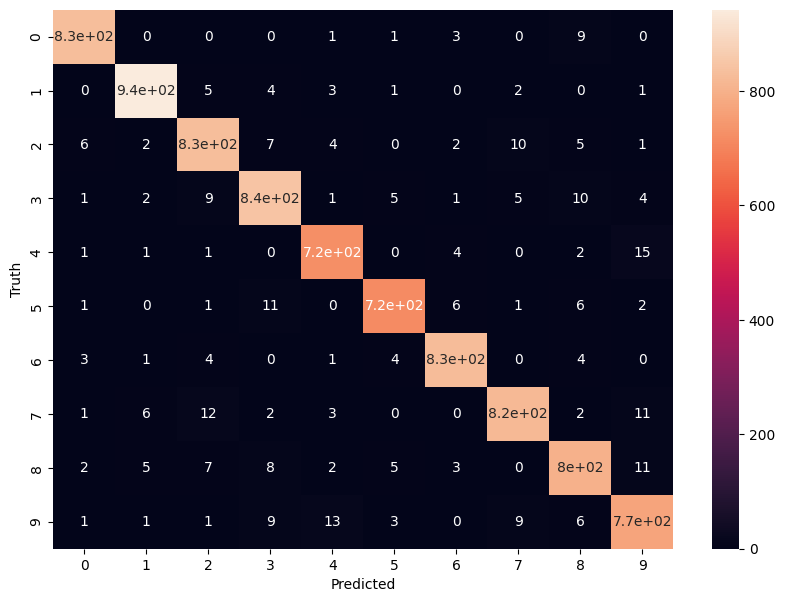

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
# Print classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       845
           1       0.98      0.98      0.98       958
           2       0.95      0.96      0.96       868
           3       0.95      0.96      0.96       881
           4       0.96      0.97      0.97       748
           5       0.97      0.96      0.97       745
           6       0.98      0.98      0.98       844
           7       0.97      0.96      0.96       854
           8       0.95      0.95      0.95       842
           9       0.94      0.95      0.95       815

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



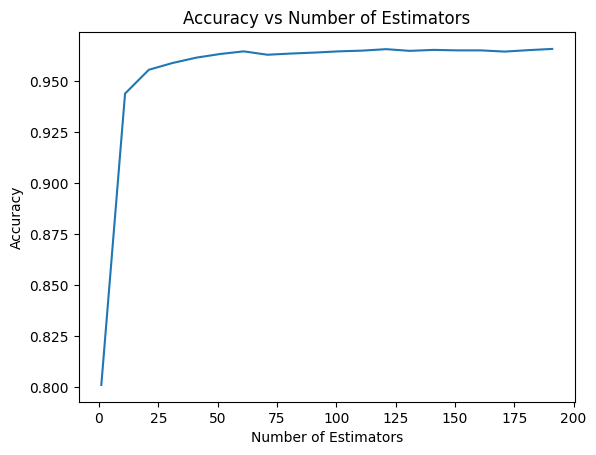

In [42]:
# Train a Random Forest classifier with varying number of estimators
estimators_range = range(1, 201, 10)
accuracies = []
for n_estimators in estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the accuracy vs number of estimators
plt.plot(estimators_range, accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

REPORT:
Based on the above implementation of MNIST dataset using the both model KNN and Random Forest, I have got the Accuracy of 96.4047619047619 percent using the K-Nearest neighbour algorithm with K=6, distance metric as Euclidean and using the Random Forest algorithm I have received the accuracy of 96.46 percent with 100 trees which is almost similar to KNN algorithm. For random forest we could see that as the number of estimaters are increased, the accuracy of algorithm keeps on increasing and finally it flattens down.Overall, we can conclude that both the K-Nearest Neighbors and Random Forest algorithms are effective at classifying handwritten digits in the MNIST dataset. 